# 在Minist数据集上进行PCA分析
图像数据维数高，而且特征之间（像素之间）相关性很高，因此我们预计用很少的维数就能保留足够多的信息

In [1]:
#导入必要的工具包
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import time

In [2]:
#读取训练数据和测试数据
dpath="./data/"
train = pd.read_csv(dpath+ 'MNIST_train.csv')
test = pd.read_csv(dpath+ 'MNIST_test.csv')

y_train = train.label.values
X_train = train.drop("label",axis=1).values
X_test = test.values 

In [3]:
#将像素值[0,255]  --> [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
# 原始输入的特征维数和样本数目
print('the shape of train_image: {0}'.format(X_train.shape))
print('the shape of test_image: {0}'.format(X_test.shape))

the shape of train_image: (42000, 784)
the shape of test_image: (28000, 784)


In [5]:
# 将训练集合拆分成训练集和校验集，在校验集上找到最佳的模型超参数（PCA的维数）
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train,y_train, test_size = 0.2, random_state = 0)

In [6]:
#拆分后的训练集和校验集的样本数目
print(X_train_part.shape)
print(X_val.shape)

(33600, 784)
(8400, 784)


In [7]:
# 一个参数点（PCA维数为n）的模型训练和测试，得到该参数下模型在校验集上的预测性能
def n_component_analysis(n, X_train, y_train, X_val, y_val):
    start = time.time()
    
    pca = PCA(n_components=n)
    print("PCA begin with n_components: {0}".format(n));
    pca.fit(X_train)
    
    # 在训练集和测试集降维 
    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)
    
    # 利用SVC训练
    print('SVC begin training ------')
    clf1 = svm.SVC()
    clf1.fit(X_train_pca, y_train)
    
    # 返回accuracy
    accuracy = clf1.score(X_val_pca, y_val)
    
    end = time.time()
    print("accuracy: {0}, time elaps:{1}".format(accuracy, int(end-start)))
    return accuracy

In [8]:
# 设置超参数（PCA维数）搜索范围
n_s = np.linspace(0.70, 0.85, num=15)
accuracy = []
for n in n_s:
    tmp = n_component_analysis(n, X_train_part, y_train_part, X_val, y_val)
    accuracy.append(tmp)

PCA begin with n_components: 0.7
SVC begin training ------
accuracy: 0.9786904761904762, time elaps:25
PCA begin with n_components: 0.7107142857142856
SVC begin training ------
accuracy: 0.9791666666666666, time elaps:24
PCA begin with n_components: 0.7214285714285714
SVC begin training ------
accuracy: 0.9794047619047619, time elaps:24
PCA begin with n_components: 0.7321428571428571
SVC begin training ------
accuracy: 0.9794047619047619, time elaps:25
PCA begin with n_components: 0.7428571428571428
SVC begin training ------
accuracy: 0.9801190476190477, time elaps:25
PCA begin with n_components: 0.7535714285714286
SVC begin training ------
accuracy: 0.9797619047619047, time elaps:26
PCA begin with n_components: 0.7642857142857142
SVC begin training ------
accuracy: 0.9798809523809524, time elaps:26
PCA begin with n_components: 0.7749999999999999
SVC begin training ------
accuracy: 0.9791666666666666, time elaps:27
PCA begin with n_components: 0.7857142857142857
SVC begin training ----

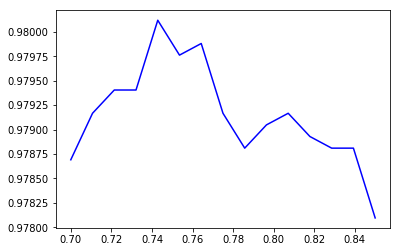

In [9]:
# 绘制不同PCA维数下模型的性能，找到最佳模型／参数（分数最高）
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_s, np.array(accuracy), 'b-')

In [10]:
#最佳模型参数
pca = PCA(n_components=0.75)

#根据最佳参数，在全体训练数据上重新训练模型
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.75, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.n_components_

33

In [12]:
pca.explained_variance_ratio_

array([0.09748938, 0.07160266, 0.06145903, 0.05379302, 0.04894262,
       0.04303214, 0.03277051, 0.02892103, 0.02766902, 0.02348871,
       0.02099325, 0.02059001, 0.01702553, 0.01692787, 0.01581126,
       0.0148324 , 0.01319688, 0.01282727, 0.01187976, 0.01152755,
       0.01072191, 0.01015199, 0.00964902, 0.00912846, 0.00887641,
       0.00838766, 0.00811856, 0.00777406, 0.00740635, 0.00686661,
       0.00657982, 0.00638799, 0.00599367])

In [14]:
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
#根据最佳参数，对全体训练数据降维
X_train_pca = pca.transform(X_train)

#根据最佳参数，对测试数据降维
X_test_pca = pca.transform(X_test)

In [16]:
X_test_pca[0]

array([ 3.32190522, -0.46932019,  3.13070354,  2.45306793,  1.20052657,
        2.0740953 ,  0.7346459 ,  0.27082966, -1.24310581,  0.98568907,
        2.56808197, -0.69164042, -1.33896483, -0.48007285, -0.31666621,
       -0.85383598, -1.7598985 ,  1.1127037 , -1.28484004, -0.65576391,
       -0.97138322,  0.58110974,  1.16467351, -1.84140247,  0.2579552 ,
       -0.46572042, -0.14093324, -0.23201418, -0.45428519, -0.67112547,
        0.74915563, -0.77246594, -0.26646933])

In [17]:
# 降维后的特征维数
print(X_train_pca.shape)
print(X_test_pca.shape)

(42000, 33)
(28000, 33)


In [18]:
#在降维后的训练数据集上训练SVM分类器
clf = svm.SVC()
clf.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
# 用在降维后的全体训练数据集上训练的模型对测试集进行测试
y_predict = clf.predict(X_test_pca)

In [23]:
#生成提交测试结果
import pandas as pd
df = pd.DataFrame(y_predict)
df.columns = ['Label']
df.index +=1 
df.index.name = 'Imageid'
df.to_csv(dpath+'SVC_Minist_submission.csv', header=True)